In [101]:
import pandas as pd 
%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


In [102]:
df = pd.read_csv("train.csv")
y = df.pop("Survived")
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
avgAge = df.Age.mean()
df.Age = df.Age.fillna(value = avgAge)
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
numeric_variables = list(df.dtypes[df.dtypes!="object"].index)
df[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [105]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state = 42)
model.fit(df[numeric_variables],y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [106]:
model.oob_score_

0.1361695005913669

In [113]:
yoob = model.oob_prediction_
print "c stat:", roc_auc_score(y,yoob)

c stat: 0.863521128261


In [108]:
df.drop(["Name","Ticket","PassengerId"],axis=1,inplace = True)

In [109]:
def clean_cabin(df):
    try:
        return df[0]
    except TypeError:
        return "None"

df["Cabin"] = df.Cabin.apply(clean_cabin)

In [110]:
categorical = ['Sex','Cabin','Embarked']
for var in categorical:
    df[var].fillna("Missing",inplace=True)
    dummy = pd.get_dummies(df[var],prefix = var)
    df = pd.concat([df,dummy],axis=1)
    df.drop([var],axis=1,inplace=True)

In [111]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state = 42)
model.fit(df,y)
print "c stat:", roc_auc_score(y,model.oob_prediction_)

c stat: 0.863521128261


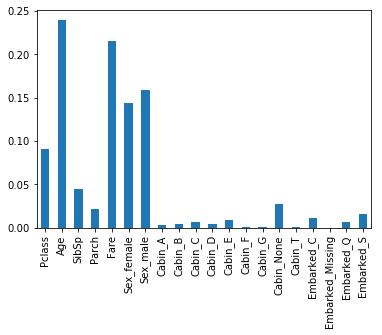

In [112]:
feature_importances = pd.Series(model.feature_importances_,index=df.columns)
feature_importances.plot(kind='bar')